In [1]:
import numpy as np
import pandas as pd

# pandas.Series의 concat 

In [2]:
s1 = pd.Series(data=[1, 2], index=['a', 'b'])
s1

a    1
b    2
dtype: int64

In [6]:
s2 = pd.Series(data=[3, 4, 5], index=['c', 'd', 'e'])
s2

c    3
d    4
e    5
dtype: int64

In [7]:
result = pd.concat([s1, s2], axis=0)  # axis의 기본값은 0이기 때문에 생략 가능
result

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [8]:
result = pd.concat([s1, s2], axis=1)
result 

,0,1
a,1.0,NaN
b,2.0,NaN
c,NaN,3.0
d,NaN,4.0
e,NaN,5.0


In [9]:
s1

a    1
b    2
dtype: int64

In [10]:
s2 = pd.Series(data=[3, 4, 5], index=['a', 'b', 'c'])
s2

a    3
b    4
c    5
dtype: int64

In [11]:
pd.concat([s1, s2], axis=0)

a    1
b    2
a    3
b    4
c    5
dtype: int64

In [12]:
pd.concat([s1, s2], axis=1)

,0,1
a,1.0,3
b,2.0,4
c,NaN,5


# pandas.DataFrame의 concat

In [13]:
df1 = pd.DataFrame(data=np.arange(6).reshape(3, 2),
                   index=['a', 'b', 'c'],
                   columns=['data1', 'data2'])
df1

,data1,data2
a,0,1
b,2,3
c,4,5


In [14]:
df2 = pd.DataFrame(data=np.arange(4).reshape(2, 2), 
                   index=['a', 'c'],
                   columns=['data2', 'data3'])
df2

,data2,data3
a,0,1
c,2,3


In [15]:
pd.concat([df1, df2], axis=0)

,data1,data2,data3
a,0.0,1,NaN
b,2.0,3,NaN
c,4.0,5,NaN
a,NaN,0,1.0
c,NaN,2,3.0


In [16]:
pd.concat([df1, df2], axis=1)

,data1,data2,data2,data3
a,0,1,0.0,1.0
b,2,3,NaN,NaN
c,4,5,2.0,3.0


https://github.com/wesm/pydata-book/tree/2nd-edition/datasets/babynames 
폴더에는 yob1880.txt ~ yob2010.txt 파일들이 있음. 파일에는 연도의 신생아 이름, 성별, 인구수가 기록되어 있음.

1. 텍스트 파일을 하나씩 읽어서 데이터프레임을 생성
2. 각 데이터프레임에 year 컬럼을 추가 
3. 131개의 데이터프레임을 하나의 데이터 프레임으로 병합(concat)

In [98]:
file_path = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob2010.txt'
df = pd.read_csv(file_path, header=None, names=['name', 'gender', 'count'])
df['year'] = 2010
df.head()

,name,gender,count,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010


In [100]:
years = range(1880, 2011)  # 연도 
col_names = ['name', 'gender', 'count']  # 데이터프레임의 컬럼 이름들
yobs = []  # 파일을 하나씩 읽어서 데이터프레임을 생성할 때마다, 생성된 데이터프레임을 append

for y in years:
    # 파일 경로
    file_path = f'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob{y}.txt'
    # 데이터프레임 생성
    df = pd.read_csv(file_path, header=None, names=col_names)
    # 데이터프레임에 파생변수 추가 
    df['year'] = y 
    # 완성된 데이터프레임을 리스트에 추가
    yobs.append(df)

# print(len(yobs))

131


In [114]:
yob_df = pd.concat(yobs, axis=0, ignore_index=True)

In [129]:
yob_df.head()

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [128]:
yob_df.tail()

,name,gender,count,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [117]:
yob_df.shape

(1690784, 4)

In [119]:
yob_df.loc[0]

name      Mary
gender       F
count     7065
year      1880
Name: 0, dtype: object

In [109]:
# df = pd.DataFrame()
# for y in range(1880, 2011):
#     file_path = f'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob{y}.txt'
#     files = pd.read_csv(file_path, sep=',', encoding='cp1252', header=None,
#                             names=['name', 'gender', 'count'])
#     files['year'] = y
#     df = pd.concat([df, files], axis=0)

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
# 연도별 신생아 숫자
# 연도별 부분집합에서 count 컬럼의 값의 합계(sum)들의 리스트
births_by_year = [yob_df[yob_df['year']  == y]['count'].sum() for y in years] 

# births_by_year = []
# for y in years:
#     sub_df = yob_df[yob_df['year'] == y]
#     births = sub_df['count'].sum()
#     births_by_year.append(births)

s = pd.Series(data=births_by_year, index=years)
s

1880     201486
1881     192703
1882     221538
1883     216954
1884     243466
         ...   
2006    3946702
2007    3986130
2008    3915955
2009    3801002
2010    3657392
Length: 131, dtype: int64

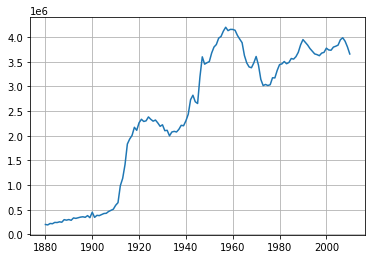

In [143]:
plt.plot(s.index, s.values)
plt.grid()
plt.show()

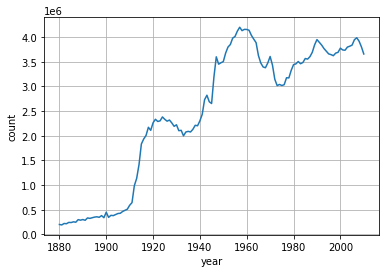

In [145]:
sns.lineplot(data=yob_df, x='year', y='count', estimator='sum', err_style=None)
plt.grid()
plt.show()

In [149]:
# 연도별 성별 신생아 숫자 시각화 
male_births = [yob_df[(yob_df['gender'] == 'M') & (yob_df['year'] == y)]['count'].sum()
            for y in years]
female_births = [yob_df[(yob_df['gender'] == 'F') & (yob_df['year'] == y)]['count'].sum()
            for y in years]
s1 = pd.Series(data=male_births, index=years)
s2 = pd.Series(data=female_births, index=years)            

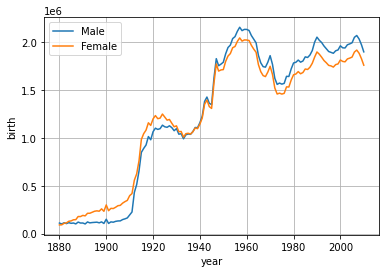

In [152]:
plt.plot(s1.index, s1.values, label='Male')
plt.plot(s2.index, s2.values, label='Female')

plt.legend()
plt.xlabel('year')
plt.ylabel('birth')
plt.grid()
plt.show()

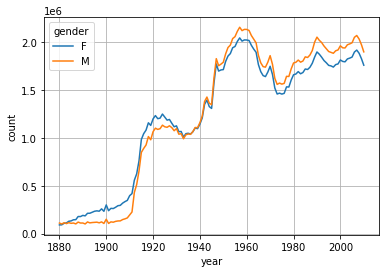

In [153]:
sns.lineplot(data=yob_df, x='year', y='count', hue='gender',
             estimator='sum', err_style=None)
plt.grid()
plt.show()

# merge, concat 연습 

https://github.com/pandas-dev/pandas/tree/master/doc/data/ 의 데이터를 사용 

* air_quality_no2_long.csv, air_quality_pm25_long 파일을 읽어서 데이터프레임을 생성 
* 두 개의 데이터프레임을 합쳐 보세요 


In [171]:
no2_file = 'https://github.com/pandas-dev/pandas/raw/master/doc/data/air_quality_no2_long.csv'
no2_df = pd.read_csv(no2_file)
#> 공기 중 NO2의 농도를 3개 도시에서 1시간 간격으로 측정한 데이터 

In [172]:
no2_df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [173]:
no2_df.tail()

,city,country,date.utc,location,parameter,value,unit
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³
2067,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³


In [175]:
no2_df.shape

(2068, 7)

In [176]:
no2_df['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [177]:
no2_df['country'].unique()

array(['FR', 'BE', 'GB'], dtype=object)

In [178]:
no2_df['location'].unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [180]:
no2_df.dtypes

city          object
country       object
date.utc      object
location      object
parameter     object
value        float64
unit          object
dtype: object

In [182]:
# date.utc 컬럼의 데이터 타입을 문자열 타입에서 'datetime64' 타입으로 변환 
no2_df['date.utc'] = no2_df['date.utc'].astype('datetime64')
no2_df.dtypes

city                 object
country              object
date.utc     datetime64[ns]
location             object
parameter            object
value               float64
unit                 object
dtype: object

In [183]:
no2_df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00,FR04014,no2,21.4,µg/m³


In [184]:
no2_df.tail()

,city,country,date.utc,location,parameter,value,unit
2063,London,GB,2019-05-07 06:00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00,London Westminster,no2,19.0,µg/m³
2067,London,GB,2019-05-07 01:00:00,London Westminster,no2,23.0,µg/m³


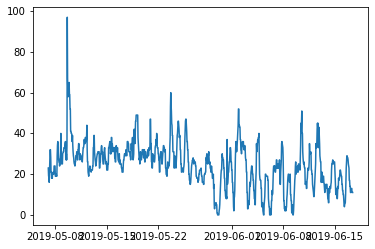

In [186]:
# London의 시간대별 NO2 농동 그래프 
london = no2_df[no2_df['city'] == 'London']
plt.plot('date.utc', 'value', data=london)
plt.show()

In [188]:
pm25_file = 'https://github.com/pandas-dev/pandas/raw/master/doc/data/air_quality_pm25_long.csv'
pm25_df = pd.read_csv(pm25_file)
#> 지름이 2.5 um 이하인 미세먼지의 공기 중 농도를 2개 도시에서 1시간 간격으로 측정한 데이터프레임

In [190]:
pm25_df.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


In [191]:
pm25_df.tail()

,city,country,date.utc,location,parameter,value,unit
1105,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
1106,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1107,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1108,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1109,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [192]:
pm25_df.shape

(1110, 7)

In [164]:
air_long.shape

(2068, 7)

In [193]:
pm25_df['city'].unique()

array(['Antwerpen', 'London'], dtype=object)

In [194]:
pm25_df['country'].unique()

array(['BE', 'GB'], dtype=object)

In [195]:
pm25_df['location'].unique()

array(['BETR801', 'London Westminster'], dtype=object)

In [196]:
pm25_df.dtypes

city          object
country       object
date.utc      object
location      object
parameter     object
value        float64
unit          object
dtype: object

In [197]:
pm25_df['date.utc'] = pm25_df['date.utc'].astype('datetime64')
pm25_df.dtypes

city                 object
country              object
date.utc     datetime64[ns]
location             object
parameter            object
value               float64
unit                 object
dtype: object

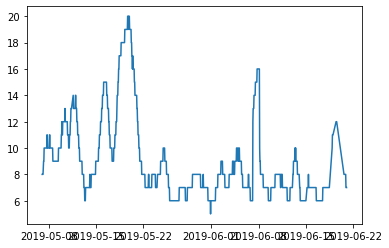

In [198]:
# london의 pm2.5 농도 시간별 그래프
london = pm25_df[pm25_df['city'] == 'London']
plt.plot('date.utc', 'value', data=london)
plt.show()

In [199]:
air_quality = pd.concat([no2_df, pm25_df], axis=0, ignore_index=True)

In [200]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00,FR04014,no2,21.4,µg/m³


In [202]:
air_quality.tail()

,city,country,date.utc,location,parameter,value,unit
3173,London,GB,2019-05-07 06:00:00,London Westminster,pm25,9.0,µg/m³
3174,London,GB,2019-05-07 04:00:00,London Westminster,pm25,8.0,µg/m³
3175,London,GB,2019-05-07 03:00:00,London Westminster,pm25,8.0,µg/m³
3176,London,GB,2019-05-07 02:00:00,London Westminster,pm25,8.0,µg/m³
3177,London,GB,2019-05-07 01:00:00,London Westminster,pm25,8.0,µg/m³


In [203]:
air_quality.shape

(3178, 7)

In [204]:
air_quality['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [205]:
air_quality['location'].unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [206]:
air_quality['parameter'].unique()

array(['no2', 'pm25'], dtype=object)

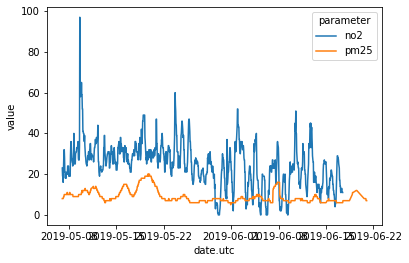

In [213]:
# air_quality 데이터프레임에서 london이 no2 변화, pm2.5 변화 그래프 
sns.lineplot(data=air_quality[air_quality['city'] == 'London'],
             x = 'date.utc', y='value', hue='parameter')
plt.show()

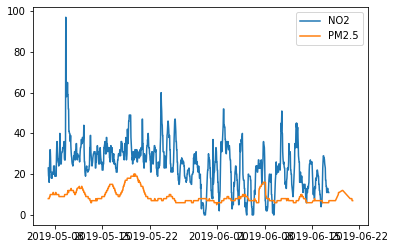

In [221]:
london_no2 = air_quality[(air_quality['city'] == 'London') &
                     (air_quality['parameter'] == 'no2')]
london_pm25 = air_quality[(air_quality['city'] == 'London') &
                     (air_quality['parameter'] == 'pm25')]

plt.plot('date.utc', 'value', data=london_no2, label='NO2')
plt.plot('date.utc', 'value', data=london_pm25, label='PM2.5')

plt.legend()
plt.show()

* air_quality_stations.csv 파일을 읽어서 데이터프레임을 생성
* air_quality 데이터프레임과 합쳐보세요

In [232]:
stations_file = 'https://github.com/pandas-dev/pandas/raw/master/doc/data/air_quality_stations.csv'
stations = pd.read_csv(stations_file)

In [233]:
stations.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


In [234]:
stations.tail()

,location,coordinates.latitude,coordinates.longitude
61,Southend-on-Sea,51.54420,0.67841
62,Southwark A2 Old Kent Road,51.48050,-0.05955
63,Thurrock,51.47707,0.31797
64,Tower Hamlets Roadside,51.52253,-0.04216
65,Groton Fort Griswold,41.35360,-72.07890


In [235]:
stations.shape

(66, 3)

In [240]:
# stations 데이터프레임에서 location이 FR로 시작하는 모든 레코드(rows)를 선택
stations[stations['location'].str.startswith('FR')]

,location,coordinates.latitude,coordinates.longitude
24,FR04004,48.89167,2.34667
25,FR04012,48.82778,2.32750
26,FR04014,48.83724,2.39390
27,FR04014,48.83722,2.39390
28,FR04031,48.86887,2.31194
29,FR04031,48.86889,2.31194
30,FR04037,48.82861,2.36028
31,FR04060,48.85720,2.29330
32,FR04071,48.85640,2.33528
33,FR04071,48.85639,2.33528


In [241]:
# stations 데이터프레임에서 location이 BETR로 시작하는 모든 레코드(rows)를 선택
stations[stations['location'].str.startswith('BETR')]

,location,coordinates.latitude,coordinates.longitude
9,BETR801,51.20966,4.43182
10,BETR802,51.20952,4.43179
11,BETR803,51.22863,4.42845
12,BETR805,51.20823,4.42156
13,BETR811,51.25210,4.49136
14,BETR815,51.21470,4.33221
15,BETR817,51.17713,4.41795
16,BETR820,51.32042,4.44481
17,BETR822,51.26429,4.34128
18,BETR831,51.34880,4.33971


In [242]:
# air_quality와 stations 데이터프레임을 merge(how=inner, on=location)
result = pd.merge(left=air_quality, right=stations, how='inner', on='location')

In [243]:
result.head(10)

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³,48.83724,2.3939
1,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³,48.83722,2.3939
2,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³,48.83724,2.3939
3,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³,48.83722,2.3939
4,Paris,FR,2019-06-20 22:00:00,FR04014,no2,26.5,µg/m³,48.83724,2.3939
5,Paris,FR,2019-06-20 22:00:00,FR04014,no2,26.5,µg/m³,48.83722,2.3939
6,Paris,FR,2019-06-20 21:00:00,FR04014,no2,24.9,µg/m³,48.83724,2.3939
7,Paris,FR,2019-06-20 21:00:00,FR04014,no2,24.9,µg/m³,48.83722,2.3939
8,Paris,FR,2019-06-20 20:00:00,FR04014,no2,21.4,µg/m³,48.83724,2.3939
9,Paris,FR,2019-06-20 20:00:00,FR04014,no2,21.4,µg/m³,48.83722,2.3939


In [244]:
result.shape

(4182, 9)

In [229]:
air_quality.shape

(3178, 7)

In [230]:
air_quality_station = pd.merge(air_quality, stations, how='left', left_on='location', right_on='location')
air_quality_station.head()


,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³,48.83724,2.3939
1,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³,48.83722,2.3939
2,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³,48.83724,2.3939
3,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³,48.83722,2.3939
4,Paris,FR,2019-06-20 22:00:00,FR04014,no2,26.5,µg/m³,48.83724,2.3939


In [231]:
air_quality_station.shape

(4182, 9)